## Have to download TeX for fancy plots...

In [1]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
^C


## And coninue...

In [ ]:
# prompt: Mount my Drive and also import all of the necessary packages to plot things using matplotlib, numpy and pandas.

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set up Seaborn style for better aesthetics
sns.set(style="ticks", palette='bright')
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 150,  # High resolution
    "savefig.dpi": 300  # High resolution for saving
})

In [ ]:
# State your working directory to access the data and save the figures
wd = '/content/drive/Shareddrives/Bachelor Research Project/Final_Results/3.4.1.Variation_of_n'


In [ ]:
# These are the average displacements for the entire structure after 5 seconds under the constant field

ns = pd.read_csv(f'{wd}/ns.csv', header=None, names=['n', 'Vertical Disp', 'Horizontal Disp'])

ns

,n,Vertical Disp,Horizontal Disp
0,1,0.786269,-0.246357
1,2,0.696290,-0.354821
2,3,0.665239,-0.460336
3,4,0.651508,-0.566766
4,5,0.641609,-0.672471
5,6,0.635434,-0.779437
6,7,0.631269,-0.887219
7,8,0.629166,-0.996362
8,9,0.626825,-1.100320
9,10,0.623772,-1.205860


In [ ]:
# The constants for the unit cell
# The length of Lx will now change at each iteration, but Ly stays constant at 3 mm

T = 5 # s
Lx = 10 # mm
Ly = 3 # mm

## Without normalisation...

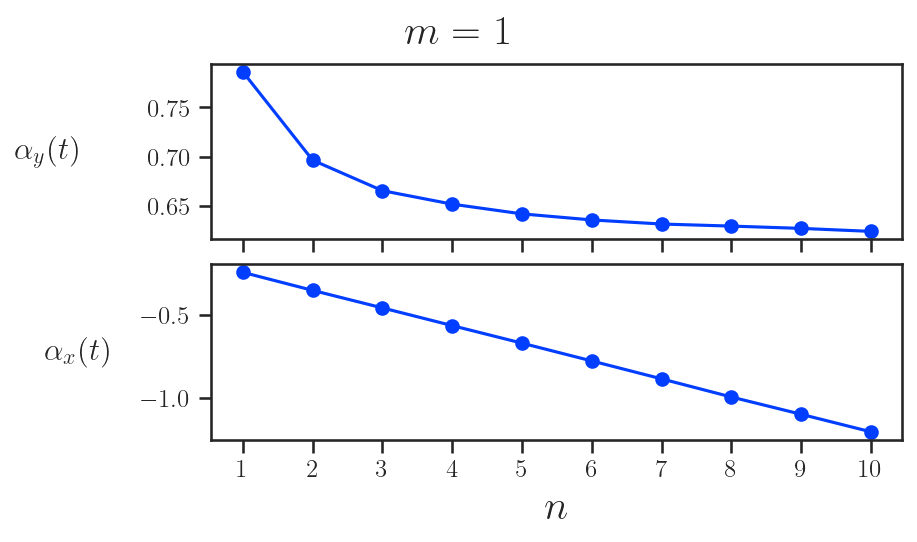

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 3.5), layout='constrained')

ax[0].plot(ns['n'], ns['Vertical Disp'], '-o')

ax[1].plot(ns['n'], ns['Horizontal Disp'], '-o')

ax[1].set_xlabel(r'$n$', fontsize=20)

ax[0].set_ylabel(r'$dy(t)$', rotation='horizontal', va='center', labelpad=48)
ax[1].set_ylabel(r'$dx (t)$', rotation='horizontal', va='center', labelpad=30)


ax[1].set_xticks(np.arange(1, 11, 1))

fig.suptitle(r'$m = 1$', fontsize=20)

plt.show()


## Final Graph

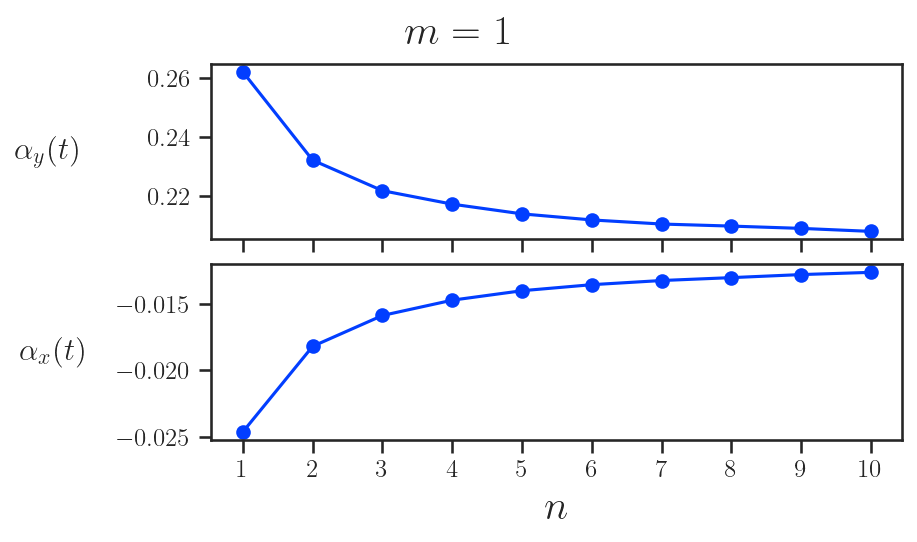

In [ ]:
Lxs = np.array( [(Lx*n - 0.5*(n-1)) for n in range(1,11,1)] )
Lys = Ly

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 3.5), layout='constrained')

ax[0].plot(ns['n'], ns['Vertical Disp']/Lys, '-o')

ax[1].plot(ns['n'], ns['Horizontal Disp']/Lxs, '-o')

ax[1].set_xlabel(r'$n$', fontsize=20)

ax[0].set_ylabel(r'$\alpha_y(t)$', rotation='horizontal', va='center', labelpad=48)
ax[1].set_ylabel(r'$\alpha_x (t)$', rotation='horizontal', va='center', labelpad=30)


ax[1].set_xticks(np.arange(1, 11, 1))

fig.suptitle(r'$m = 1$', fontsize=20)

plt.savefig(f'{wd}/n_Variation_Displacements.svg', dpi=300)
plt.savefig(f'{wd}/n_Variation_Displacements.png', dpi=300)

plt.show()
